In [ ]:
# 과제1. 2장 주성분 분석 연습문제 4번

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 데이터 읽기
crime = pd.read_csv("c:/data/mva/ex2-4.csv")
crime.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [2]:
# 기술통계량 구하기(소수점 이하 2자리 반올림 표시)
round(crime.describe(), 2)

,Murder,Assault,UrbanPop,Rape
count,50.00,50.00,50.00,50.00
mean,7.79,170.76,65.54,21.23
std,4.36,83.34,14.47,9.37
min,0.80,45.00,32.00,7.30
25%,4.08,109.00,54.50,15.08
50%,7.25,159.00,66.00,20.10
75%,11.25,249.00,77.75,26.18
max,17.40,337.00,91.00,46.00


In [5]:
# 분석변수 선택: 1열 state 제외
crime_data = crime.iloc[:, 1:]
crime_data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [4]:
# 변수 표준화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(crime_data)

In [6]:
# 초기 주성분 분석
from sklearn.decomposition import PCA
pca_init = PCA(n_components=len(crime_data.columns))
pca_init.fit(x)
pca_init.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [16]:
# 주성분 분산의 합: 4가 나와야 하는데 4.08xxx 으로 주성분 분석이 불안정
np.sum(pca_init.explained_variance_)

4.081632653061225

In [13]:
# 주성분 분산 비율
pca_init.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [14]:
# 누적분산 비율: R 결과값과 동일
np.cumsum(pca_init.explained_variance_ratio_)

array([0.62006039, 0.86750168, 0.95664248, 1.        ])

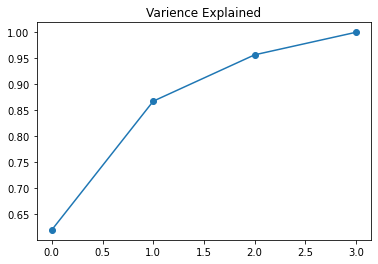

In [15]:
# 누적분산 그림
plt.title('Varience Explained')
plt.plot(np.cumsum(pca_init.explained_variance_ratio_), 'o-')
plt.show()

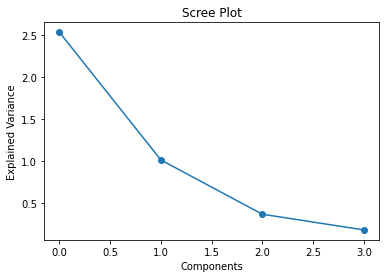

In [7]:
# 스크리 그림
plt.title('Scree Plot')
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.plot(pca_init.explained_variance_, 'o-')
plt.show()

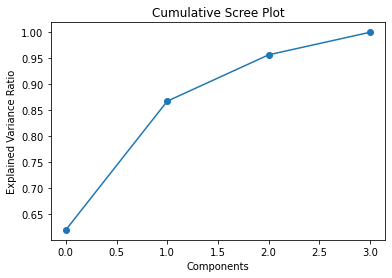

In [12]:
# 누적 스크리 그림
plt.title('Cumulative Scree Plot')
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.plot(np.cumsum(pca_init.explained_variance_ratio_), 'o-')
plt.show()

In [18]:
# 주성분 분석: 주성분 수 2개
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
crime_pca = pca.fit_transform(x)

In [19]:
# 주성분 계수(소수점 이하 2자리 반올림 표시)
np.round(pca.components_, 3)

array([[ 0.536,  0.583,  0.278,  0.543],
       [ 0.418,  0.188, -0.873, -0.167]])

In [20]:
# 주성분 점수
crime_pca[0:5,:]

array([[ 0.98556588,  1.13339238],
       [ 1.95013775,  1.07321326],
       [ 1.76316354, -0.74595678],
       [-0.14142029,  1.11979678],
       [ 2.52398013, -1.54293399]])

In [19]:
# 주성분 점수
crime_pca

array([[ 0.98556588,  1.13339238],
       [ 1.95013775,  1.07321326],
       [ 1.76316354, -0.74595678],
       [-0.14142029,  1.11979678],
       [ 2.52398013, -1.54293399],
       [ 1.51456286, -0.98755509],
       [-1.35864746, -1.08892789],
       [ 0.04770931, -0.32535892],
       [ 3.01304227,  0.03922851],
       [ 1.63928304,  1.2789424 ],
       [-0.91265715, -1.57046001],
       [-1.63979985,  0.21097292],
       [ 1.37891072, -0.68184119],
       [-0.50546136, -0.15156254],
       [-2.25364607, -0.10405407],
       [-0.79688112, -0.2701647 ],
       [-0.75085907,  0.95844029],
       [ 1.56481798,  0.87105466],
       [-2.39682949,  0.37639158],
       [ 1.76336939,  0.42765519],
       [-0.48616629, -1.4744965 ],
       [ 2.10844115, -0.15539682],
       [-1.69268181, -0.63226125],
       [ 0.99649446,  2.39379599],
       [ 0.69678733, -0.26335479],
       [-1.18545191,  0.53687437],
       [-1.26563654, -0.19395373],
       [ 2.87439454, -0.7756002 ],
       [-2.38391541,

In [ ]:
# 과제2. 3장  인자 분석 연습문제 3번

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 데이터 읽기
fifa = pd.read_csv("c:/data/mva/FIFA21_official_data_withoutNaN.csv")
fifa.head()

,ID,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,176580,80,92,84,83,90,84,86,82,77,...,84,83,85,45,38,27,25,31,33,37
1,192985,94,82,55,94,82,88,85,83,93,...,94,84,91,65,53,15,13,5,10,13
2,212198,87,77,58,88,86,85,86,87,87,...,90,91,86,67,55,12,14,15,8,14
3,194765,83,88,83,84,87,87,86,85,82,...,85,86,89,54,49,14,8,14,13,14
4,224334,87,66,57,81,68,87,88,75,78,...,82,76,87,82,79,8,14,13,13,14


In [22]:
# 변수 선택
fifa_data = fifa.iloc[:,1:]
# 기술통계량 구하기
fifa_data.describe()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,16821.000000,16821.000000,16821.000000,16821.000000,16821.000000,16821.000000,16821.000000,16821.000000,16821.000000,16821.000000,...,16821.000000,16821.000000,16821.000000,16821.000000,16821.000000,16821.000000,16821.000000,16821.000000,16821.000000,16821.000000
mean,51.250758,47.634207,53.199037,60.188931,44.596814,57.605731,49.155520,43.862196,53.959396,60.286844,...,55.179894,49.790619,59.634088,48.068367,45.909993,15.686820,15.523096,15.392069,15.543250,15.769514
std,17.933598,19.434891,17.003937,14.051239,17.694194,18.156329,18.177882,17.370113,14.951259,16.013848,...,13.657327,15.615434,11.912131,21.504574,21.192998,16.921874,16.215930,15.862697,16.446074,17.232424
min,6.000000,3.000000,5.000000,7.000000,4.000000,5.000000,4.000000,5.000000,9.000000,5.000000,...,10.000000,7.000000,12.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,40.000000,32.000000,45.000000,55.000000,32.000000,52.000000,37.000000,32.000000,45.000000,56.000000,...,46.000000,40.000000,52.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,55.000000,52.000000,56.000000,63.000000,46.000000,63.000000,51.000000,42.000000,57.000000,64.000000,...,57.000000,51.000000,60.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,65.000000,63.000000,65.000000,69.000000,58.000000,69.000000,63.000000,57.000000,65.000000,70.000000,...,65.000000,61.000000,68.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,94.000000,95.000000,93.000000,94.000000,90.000000,96.000000,94.000000,94.000000,93.000000,96.000000,...,95.000000,92.000000,96.000000,93.000000,95.000000,90.000000,92.000000,93.000000,91.000000,90.000000


In [23]:
# 인자분석 유의성 검정
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(fifa_data)
chi_square_value, p_value

(929630.4027290995, 0.0)

In [24]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(fifa_data)
kmo_model

0.9696402195385802

In [26]:
# 초기 인자분석 실행
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None)
fa.fit(fifa_data)
# 고윳값 구하기
ev, v = fa.get_eigenvalues()
ev

array([17.87966149,  4.5427424 ,  2.94590728,  1.79041155,  1.36780887,
        0.60224284,  0.44224002,  0.33838567,  0.31283176,  0.28427022,
        0.25838792,  0.2386034 ,  0.20710617,  0.19496595,  0.18922822,
        0.17197376,  0.154977  ,  0.13182625,  0.12808383,  0.11847152,
        0.10326586,  0.0900933 ,  0.07669736,  0.06474389,  0.06193828,
        0.06017035,  0.05631684,  0.03771976,  0.03423692,  0.03235278,
        0.03188949,  0.02812511,  0.02232395])

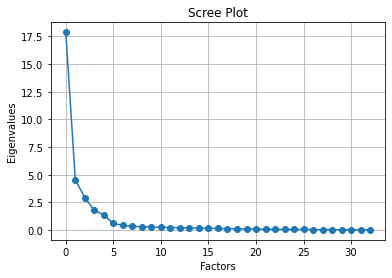

In [27]:
# 스크리 그림 그리기
plt.plot(ev, 'o-')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

In [28]:
# 인자분석: varimax 인자회전
fa_varimax = FactorAnalyzer(n_factors=5, rotation='varimax', method='principal')
fa_varimax.fit(fifa_data)
# 인자적재계수
np.round(fa_varimax.loadings_, 3)

array([[ 0.637,  0.355,  0.312,  0.441, -0.083],
       [ 0.789, -0.216,  0.419,  0.263,  0.081],
       [ 0.314,  0.331,  0.642, -0.082,  0.496],
       [ 0.679,  0.475,  0.378,  0.242,  0.07 ],
       [ 0.817, -0.111,  0.388,  0.209,  0.089],
       [ 0.692,  0.171,  0.468,  0.445,  0.006],
       [ 0.793,  0.175,  0.287,  0.323, -0.077],
       [ 0.788,  0.2  ,  0.249,  0.203, -0.137],
       [ 0.641,  0.603,  0.194,  0.175, -0.038],
       [ 0.7  ,  0.286,  0.486,  0.338,  0.081],
       [ 0.285,  0.003,  0.327,  0.835,  0.09 ],
       [ 0.255, -0.   ,  0.364,  0.782,  0.178],
       [ 0.46 ,  0.041,  0.188,  0.786, -0.019],
       [ 0.627,  0.327, -0.325,  0.021,  0.422],
       [ 0.346,  0.106,  0.194,  0.761, -0.179],
       [ 0.865, -0.058,  0.056,  0.031,  0.183],
       [-0.027,  0.173,  0.012,  0.235,  0.779],
       [ 0.357,  0.443,  0.382,  0.406,  0.321],
       [ 0.095,  0.212,  0.121, -0.455,  0.707],
       [ 0.846,  0.015,  0.351,  0.229,  0.055],
       [ 0.273,  0.6

In [29]:
# 인자 공통성(communality)
np.round(fa_varimax.get_communalities(), 3)

array([0.83 , 0.922, 0.874, 0.894, 0.882, 0.926, 0.853, 0.783, 0.844,
       0.927, 0.893, 0.841, 0.866, 0.785, 0.779, 0.789, 0.693, 0.737,
       0.776, 0.895, 0.784, 0.933, 0.893, 0.818, 0.823, 0.774, 0.952,
       0.946, 0.965, 0.963, 0.957, 0.963, 0.966])

In [30]:
# 인자 고유분산: 1-공통성
np.round(fa_varimax.get_uniquenesses(), 3)

array([0.17 , 0.078, 0.126, 0.106, 0.118, 0.074, 0.147, 0.217, 0.156,
       0.073, 0.107, 0.159, 0.134, 0.215, 0.221, 0.211, 0.307, 0.263,
       0.224, 0.105, 0.216, 0.067, 0.107, 0.182, 0.177, 0.226, 0.048,
       0.054, 0.035, 0.037, 0.043, 0.037, 0.034])

In [31]:
# 인자 분산
np.round(fa_varimax.get_factor_variance(), 3)

array([[10.236,  5.065,  6.688,  4.415,  2.123],
       [ 0.31 ,  0.153,  0.203,  0.134,  0.064],
       [ 0.31 ,  0.464,  0.666,  0.8  ,  0.864]])

In [ ]:
# 4장 군집분석 연습문제 5번

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 데이터 읽기
data = pd.read_csv("c:/data/mva/mall_customer.csv", index_col='CustomerID')
data.head()

,Gender,Age,Income,Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [82]:
customer = pd.get_dummies(data)
customer.head()

,Age,Income,Spending_Score,Gender_Female,Gender_Male
CustomerID,,,,,
1,19,15,39,0,1
2,21,15,81,0,1
3,20,16,6,1,0
4,23,16,77,1,0
5,31,17,40,1,0


In [83]:
customer_data = customer.iloc[:,:-1]
customer_data.head()

,Age,Income,Spending_Score,Gender_Female
CustomerID,,,,
1,19,15,39,0
2,21,15,81,0
3,20,16,6,1
4,23,16,77,1
5,31,17,40,1


In [58]:
# 기술통계량 구하기
customer_data.describe()

,Age,Income,Spending_Score,Gender_Female,Gender_Male
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.560000,0.440000
std,13.969007,26.264721,25.823522,0.497633,0.497633
min,18.000000,15.000000,1.000000,0.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000,0.000000
50%,36.000000,61.500000,50.000000,1.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000,1.000000


In [89]:
# 표준화 패키기 불러오기
from sklearn.preprocessing import StandardScaler
# 자료 표준화
zcustomer = StandardScaler().fit_transform(customer_data)
zcustomer.mean()

-1.3433698597964394e-16

In [90]:
zcustomer.std()

1.0

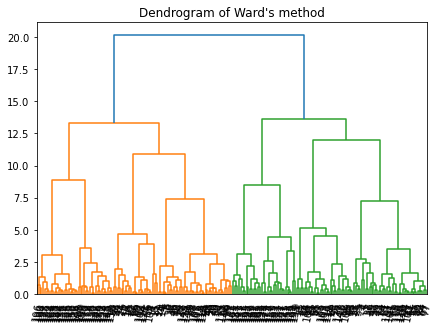

In [91]:
import scipy.cluster.hierarchy as sch
# 계층적 군집분석: 와드의 방법
wlink = sch.linkage(zcustomer, 'ward')
# 덴드로그램 그리기
plt.figure(figsize=(7,5))
sch.dendrogram(wlink,  leaf_rotation=80,  leaf_font_size=10,  labels=customer.index )
plt.title("Dendrogram of Ward's method")
plt.show()

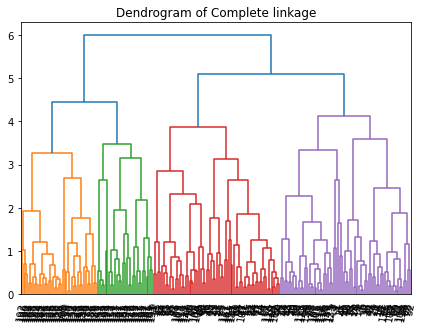

In [92]:
# 계층적 군집분석 시행하기: 최장연결법
clink = sch.linkage(zcustomer, 'complete')
# 덴드로그램 그리기
plt.figure(figsize=(7,5))
sch.dendrogram(clink,  leaf_rotation=80,  leaf_font_size=10,  labels = customer.index)
plt.title("Dendrogram of Complete linkage")
plt.show()

In [73]:
from sklearn.cluster import AgglomerativeClustering
# 계층적 군집분석: 와드의 방법
wcluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',
 linkage='ward')
# linkage: {"ward", "complete", "average", "single"}, default="ward"
# 소속군집
member1 = wcluster.fit_predict(zcustomer)
member1

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [72]:
# 계층적 군집분석: 최장연결법
ccluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean',
 linkage='complete')
# linkage: {"ward", "complete", "average", "single"}, default="ward"
# 소속군집
member2 = ccluster.fit_predict(zcustomer)
member2

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 2, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 2, 3, 0, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int64)

In [93]:
from sklearn.cluster import KMeans
# k-평균 군집분석: 군집수 = 6
kmc = KMeans(n_clusters=6)
kmc.fit(zcustomer)

KMeans(n_clusters=6)

In [94]:
# 군집 중심 알기
kmc.cluster_centers_

array([[-0.92608124, -0.70017176,  0.28182355,  0.88640526],
       [-0.94229664, -0.76949569,  0.34162973, -1.12815215],
       [-0.07756323,  1.17949408, -1.32321797, -0.12087344],
       [ 1.32723522, -0.22295718, -0.52821586, -1.12815215],
       [ 0.84395877, -0.41610264, -0.39029872,  0.88640526],
       [-0.44191719,  0.99158305,  1.23950275, -0.04339047]])

In [95]:
# 소속군집 알기
kmc.labels_

array([1, 1, 0, 0, 0, 0, 4, 0, 3, 0, 3, 0, 4, 0, 1, 1, 0, 1, 3, 0, 1, 1,
       4, 1, 4, 1, 4, 1, 4, 0, 3, 0, 3, 1, 4, 0, 4, 0, 4, 0, 4, 1, 3, 0,
       4, 0, 4, 0, 0, 0, 4, 1, 0, 3, 4, 3, 4, 3, 0, 3, 3, 1, 4, 4, 3, 1,
       4, 4, 1, 0, 3, 4, 4, 4, 3, 1, 4, 1, 0, 4, 3, 1, 3, 4, 0, 3, 4, 0,
       0, 4, 4, 1, 3, 4, 0, 1, 4, 0, 3, 1, 0, 4, 3, 1, 3, 0, 4, 3, 3, 3,
       3, 0, 4, 1, 0, 0, 4, 4, 4, 4, 1, 4, 4, 5, 0, 5, 3, 5, 3, 5, 3, 5,
       0, 5, 2, 5, 2, 5, 2, 5, 4, 5, 0, 5, 2, 5, 3, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 4, 5, 2, 5, 3, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       3, 5, 3, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5])